# Efficient-CapsNet Model Train

In this notebook we provide a simple interface to train Efficient-CapsNet on the three dataset discussed in "Efficient-CapsNet: Capsule Network with Self-Attention Routing":

- MNIST (MNIST)
- smallNORB (SMALLNORB)
- Multi-MNIST (MULTIMNIST)

The hyperparameters have been only slightly investigated. So, there's a lot of room for improvements. Good luck!

**NB**: remember to modify the "config.json" file with the appropriate parameters.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
from utils import Dataset, plotImages, plotWrongImages, plotHistory
from models import EfficientCapsNet

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [4]:
# some parameters
model_name = 'MULTIMNIST'

# 1.0 Import the Dataset

In [5]:
dataset = Dataset(model_name, config_path='config.json')

[INFO] Dataset loaded!


## 1.1 Visualize imported dataset

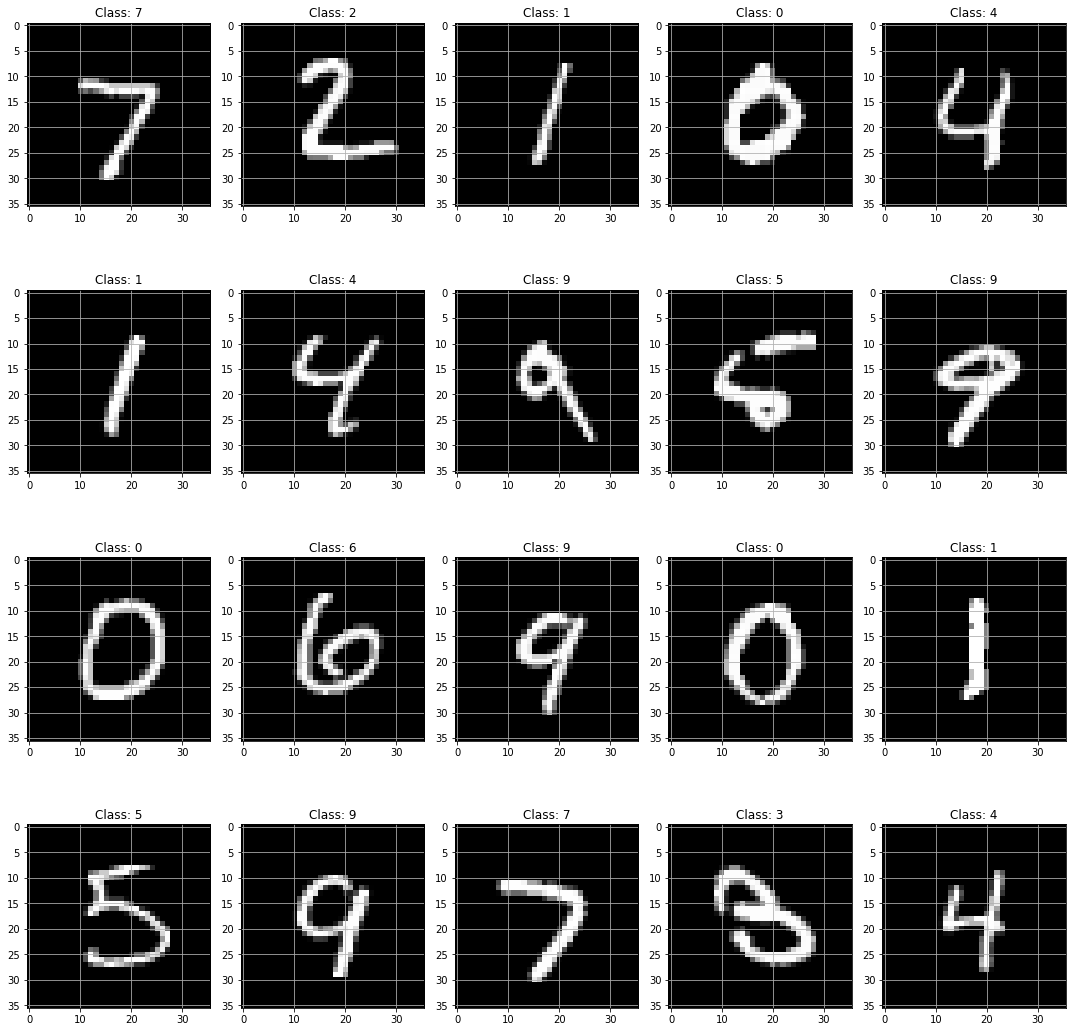

In [6]:
n_images = 20 # number of images to be plotted
plotImages(dataset.X_test[:n_images,...,0], dataset.y_test[:n_images], n_images, dataset.class_names)

# 2.0 Load the Model

In [7]:
model_train = EfficientCapsNet(model_name, mode='train', verbose=True)

Model: "Efficient_CapsNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 36, 36, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        832       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 64)  

# 3.0 Train the Model

In [8]:
dataset_train, dataset_val = dataset.get_tf_data() 

In [9]:
history = model_train.train(dataset, initial_epoch=0)

------------------------------MULTIMNIST train------------------------------
Epoch 1/150
    1/37500 [..............................] - ETA: 5s - loss: 1.6535 - Efficient_CapsNet_loss: 1.5598 - Generator_loss: 0.2383 - Generator_1_loss: 0.2399 - Efficient_CapsNet_accuracy: 0.0000e+00WARNING:tensorflow:From /home/aistudio/Desktop/remote/Efficient-CapsNet/venv/lib/python3.7/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
37499/37500 [============================>.] - ETA: 0s - loss: 0.2303 - Efficient_CapsNet_loss: 0.2135 - Generator_loss: 0.0427 - Generator_1_loss: 0.0427 - Efficient_CapsNet_accuracy: 0.5309

UnknownError: 2 root error(s) found.
  (0) Unknown:  NameError: name 'label' is not defined
Traceback (most recent call last):

  File "/home/aistudio/Desktop/remote/Efficient-CapsNet/venv/lib/python3.7/site-packages/tensorflow/python/ops/script_ops.py", line 244, in __call__
    ret = func(*args)

  File "/home/aistudio/Desktop/remote/Efficient-CapsNet/venv/lib/python3.7/site-packages/tensorflow/python/autograph/impl/api.py", line 302, in wrapper
    return func(*args, **kwargs)

  File "/home/aistudio/Desktop/remote/Efficient-CapsNet/venv/lib/python3.7/site-packages/tensorflow/python/data/ops/dataset_ops.py", line 827, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/home/aistudio/Desktop/remote/Efficient-CapsNet/utils/pre_process_multimnist.py", line 84, in multi_mnist_val
    yield (merged, label[i], labels[j]), (labels[i] + labels[j], base, top)

NameError: name 'label' is not defined


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
	 [[Shape/_10]]
  (1) Unknown:  NameError: name 'label' is not defined
Traceback (most recent call last):

  File "/home/aistudio/Desktop/remote/Efficient-CapsNet/venv/lib/python3.7/site-packages/tensorflow/python/ops/script_ops.py", line 244, in __call__
    ret = func(*args)

  File "/home/aistudio/Desktop/remote/Efficient-CapsNet/venv/lib/python3.7/site-packages/tensorflow/python/autograph/impl/api.py", line 302, in wrapper
    return func(*args, **kwargs)

  File "/home/aistudio/Desktop/remote/Efficient-CapsNet/venv/lib/python3.7/site-packages/tensorflow/python/data/ops/dataset_ops.py", line 827, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/home/aistudio/Desktop/remote/Efficient-CapsNet/utils/pre_process_multimnist.py", line 84, in multi_mnist_val
    yield (merged, label[i], labels[j]), (labels[i] + labels[j], base, top)

NameError: name 'label' is not defined


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
0 successful operations.
0 derived errors ignored. [Op:__inference_test_function_4392280]

Function call stack:
test_function -> test_function


In [ ]:
plotHistory(history)